[1.65300540e-39 4.02030823e-37 8.21294420e-35 1.40926555e-32
 2.03114646e-30 2.45891823e-28 2.50035328e-26 2.13556653e-24
 1.53207236e-22 9.23208709e-21 4.67277585e-19 1.98657263e-17
 7.09395432e-16 2.12778023e-14 5.36067643e-13 1.13440168e-11
 2.01636230e-10 3.01040355e-09 3.77515954e-08 3.97649411e-07
 3.51819429e-06 2.61453065e-05 1.63200730e-04 8.55667227e-04
 3.76827112e-03 1.39390709e-02 4.33091794e-02 1.13026564e-01
 2.47762478e-01 4.56189189e-01 7.05519276e-01 9.16488924e-01
 1.00000000e+00 9.16488924e-01 7.05519276e-01 4.56189189e-01
 2.47762478e-01 1.13026564e-01 4.33091794e-02 1.39390709e-02
 3.76827112e-03 8.55667227e-04 1.63200730e-04 2.61453065e-05
 3.51819429e-06 3.97649411e-07 3.77515954e-08 3.01040355e-09
 2.01636230e-10 1.13440168e-11 5.36067643e-13 2.12778023e-14
 7.09395432e-16 1.98657263e-17 4.67277585e-19 9.23208709e-21
 1.53207236e-22 2.13556653e-24 2.50035328e-26 2.45891823e-28
 2.03114646e-30 1.40926555e-32 8.21294420e-35 4.02030823e-37]


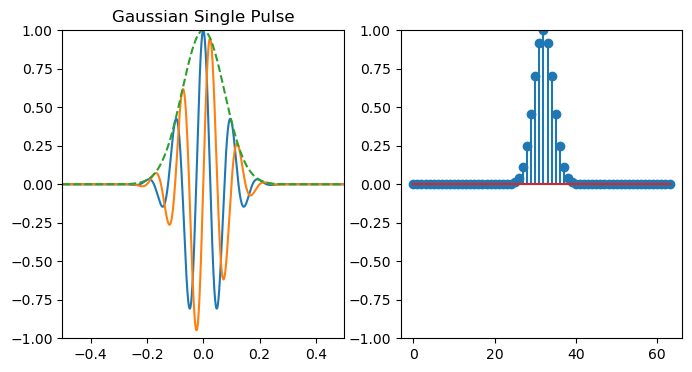

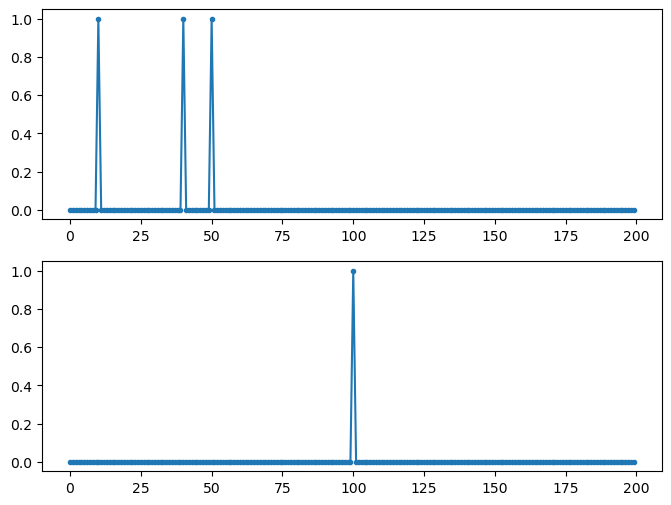

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c
from scipy import signal

sampling_rate = 8192
time_seconds = 1 
number_of_pulses = 16
pulse_frequency = 1/(time_seconds/(number_of_pulses/2))

t0 = np.linspace(-1*time_seconds, 1*time_seconds, sampling_rate, endpoint=False)

signal_dbfs = 0.8 #-1dBFS

fig1 = plt.figure(figsize = (8,4), facecolor='white')


# Create multiple pngs:
m = 64

i_at_zeroposition = np.zeros(m)
q_at_zeroposition = np.zeros(m)
e_at_zeroposition = np.zeros(m)

for ii in range(m):

    i, q, e = signal.gausspulse(t0, fc=10 + 0*ii, retquad=True, retenv=True)
    

    i_at_zeroposition[ii] = i[0 + 128*ii]
    q_at_zeroposition[ii] = q[0 + 128*ii]
    e_at_zeroposition[ii] = e[0 + 128*ii]

    t1 = t0 + 0.02*ii - 0.5

    ax1 = fig1.add_subplot(1, 2, 1)
    ax1.set_title("Gaussian Single Pulse")
    ax1.plot(t1, i, t1, q, t1, e, '--')
    ax1.set_xlim([-0.5, 0.5])
    ax1.set_ylim([-1, 1])
    
    ax12= fig1.add_subplot(1, 2, 2)
    ax12.plot(i_at_zeroposition,'--')
    ax12.plot(q_at_zeroposition,'--')
    ax12.plot(e_at_zeroposition, '--')
    ax12.set_ylim([-1,1])

    plt.savefig(f"{sampling_rate}_{ii}.png", dpi=300)
    
    plt.clf()

print(e_at_zeroposition)

# For static graph:

ax1 = fig1.add_subplot(1, 2, 1)
ax1.set_title("Gaussian Single Pulse")
ax1.set_xlim([-0.5, 0.5])
ax1.set_ylim([-1, 1])
ax1.plot(t0, i, t0, q, t0, e, '--')

ax12= fig1.add_subplot(1, 2, 2)
ax12.stem(e_at_zeroposition)
ax12.set_ylim([-1,1])

# Scipy.signal.unit_impulse

imp1 = signal.unit_impulse(200, [10,40,50])
imp2 = signal.unit_impulse(200, 'mid')

fig2 = plt.figure(figsize = (8,6), facecolor='white')

ax21 = fig2.add_subplot(2, 1, 1)
ax22 = fig2.add_subplot(2, 1, 2)

ax21.plot(imp1,".-")
ax22.plot(imp2,".-")

plt.show()